# DIAMOND PRICE PREDICTION

# Abstract

# Index

1. Importing Libraries
2. Understanding the Data
3. Data Cleaning
4. EDA
5. Linear Regression Modeling
6. Predicting Prices

# 1. Importing Libraries

In [842]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. Understanding the Data

Each row of the DataFrame represents a diamond and the Columns are the attributes of these diamonds.

Description of the data:

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

Here the price is our main target. We will analyse the data and train a model to predict prices of another DataFrame.

## The 4 "C"s of a diamond:

<img src="images/4Cs.jpg" style="width: 543;"/>

<b>CUT:</b> The quality of the cut is measured by its Proportion, Symmetry and Final Polish. It represents how well a diamond refracts and reflects light.

<b>COLOR:</b> A diamond has many hues and this DataSet has only the High Quality types of colors. The scale goes from "D" (best) to "Z" (Worst), but diamonds with colors from "K" to "Z" are called tinted and are not represented in this DataSet.

<b>CLARITY:</b> Diamonds have characteristics known as inclusions (internal) and blemishes (external). Diamons without inclusions or blemishes are rare.

<b>CARAT:</b> Carat represents the weight of a diamond. 1 carat = 0.2 grams. It is expected that the heavier the diamond, the higher its price.

# 3. Data Cleaning

In [843]:
diamonds = pd.read_csv('data/asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')

Let's take a look at the statistics of the data

In [844]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [845]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48940.0,0.797817,0.474126,0.2,0.40,0.70,1.04,5.01
depth,48940.0,61.751931,1.430026,43.0,61.00,61.80,62.50,79.00
table,48940.0,57.451161,2.233450,43.0,56.00,57.00,59.00,95.00
price,48940.0,3934.409644,3989.333861,326.0,949.00,2401.00,5331.25,18823.00
x,48940.0,5.730712,1.121920,0.0,4.71,5.69,6.54,10.74
y,48940.0,5.734333,1.145344,0.0,4.72,5.71,6.54,58.90
z,48940.0,3.538648,0.706817,0.0,2.91,3.52,4.04,31.80


Since the variables 'x', 'y' and 'z' are measures of the diamond, it is not acceptable to have zeros. So, let's clear this data

In [846]:
mask = mask = (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)
diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [847]:
mask_0 = mask_0 = (diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] == 0)
diamonds_0 = diamonds[mask_0]

def calculate_z(z):
    z = diamonds_0['depth']*(diamonds_0['x']+diamonds_0['y'])/200
    diamonds_0['z'] = round(z, 2)
    return diamonds_0['z']

diamonds_0['z'].apply(calculate_z)

diamonds[mask_0] = diamonds_0

diamonds[mask_0]

C:\Users\mathe\AppData\Local\Temp/ipykernel_14912/2376418458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_0['z'] = round(z, 2)


,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.85
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.85
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.09
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,3.84
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.54
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,4.06
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,5.03
23691,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,5.19
24573,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,5.14
24934,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,5.01


Now, let's drop the values we cannot calculate

In [848]:
diamonds['z'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds['x'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds['y'].replace(to_replace=0, value=np.nan, inplace=True)
diamonds = diamonds.dropna()

In [849]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48933 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48933 non-null  float64
 1   cut      48933 non-null  object 
 2   color    48933 non-null  object 
 3   clarity  48933 non-null  object 
 4   depth    48933 non-null  float64
 5   table    48933 non-null  float64
 6   price    48933 non-null  int64  
 7   x        48933 non-null  float64
 8   y        48933 non-null  float64
 9   z        48933 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [850]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000
mean,0.797748,61.751904,57.451041,3933.641592,5.731532,5.735018,3.540181
std,0.474093,1.429933,2.232986,3988.524750,1.119905,1.143657,0.703833
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Checking for outliers

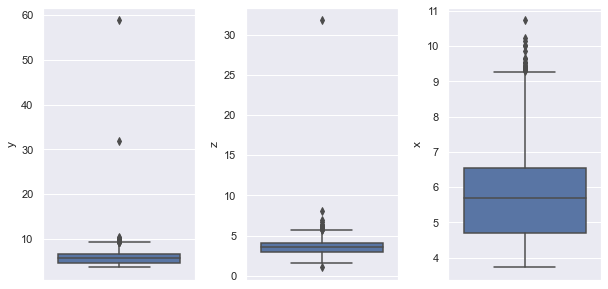

In [851]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
sns.boxplot(y=diamonds.x, ax=ax[2])
plt.subplots_adjust(wspace=0.33)

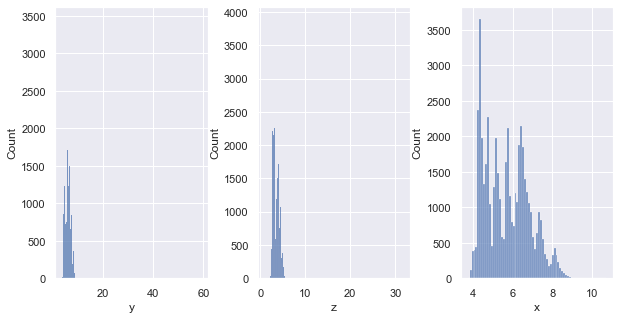

In [852]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.histplot(diamonds['y'], ax=ax[0])
sns.histplot(diamonds['z'], ax=ax[1])
sns.histplot(diamonds['x'], ax=ax[2])
plt.subplots_adjust(wspace=0.33)

Outliers on 'y'

In [853]:
diamonds[diamonds['y']>20]

,carat,cut,color,clarity,depth,table,price,x,y,z
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


We can calculate the real 'y' using the other measures

In [854]:
diamonds.loc[21828, 'y'] = round((200*diamonds.loc[21828, 'z']/diamonds.loc[21828, 'depth'])-diamonds.loc[21828, 'x'], 2)
diamonds.loc[44603, 'y'] = round((200*diamonds.loc[44603, 'z']/diamonds.loc[44603, 'depth'])-diamonds.loc[44603, 'x'], 2)
print(diamonds.loc[21828, 'y'], diamonds.loc[44603, 'y'])

19.28 11.42


Outliers on 'z'

In [855]:
diamonds[diamonds['z']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
43882,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [856]:
diamonds.loc[43882, 'z'] = round(diamonds.loc[43882, 'depth']*(diamonds.loc[43882, 'x']+diamonds.loc[43882, 'y'])/200, 2)
print(diamonds.loc[43882, 'z'])

3.17


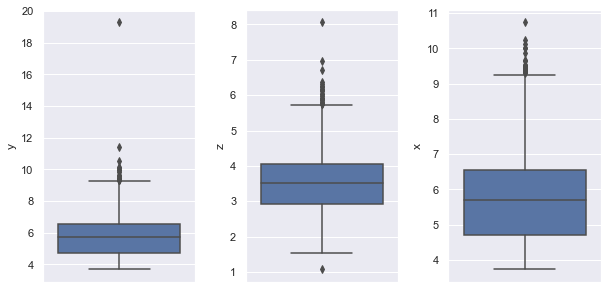

In [857]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
sns.boxplot(y=diamonds.x, ax=ax[2])
plt.subplots_adjust(wspace=0.33)

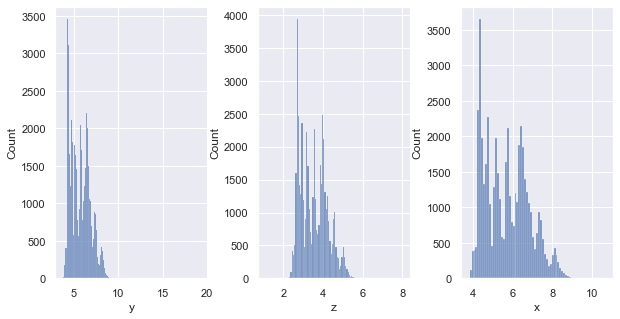

In [858]:
fig, ax = plt.subplots(1,3, figsize=(10, 5))
sns.histplot(diamonds['y'], ax=ax[0])
sns.histplot(diamonds['z'], ax=ax[1])
sns.histplot(diamonds['x'], ax=ax[2])
plt.subplots_adjust(wspace=0.33)

In [859]:
diamonds[diamonds['y']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,19.28,8.06
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,11.42,5.12


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='table'>

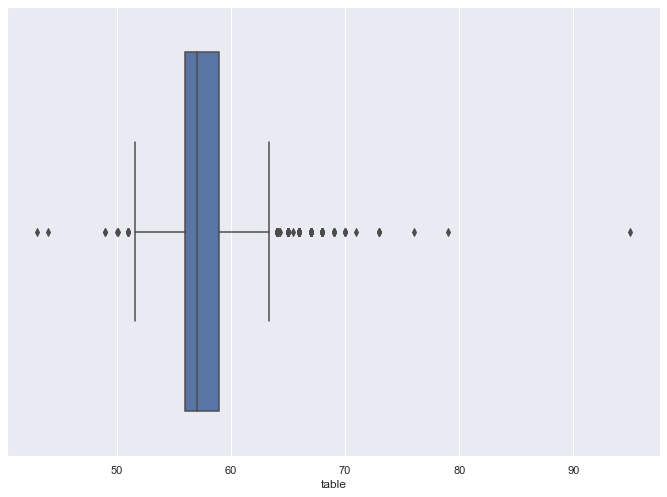

In [860]:
sns.boxplot(diamonds['table'])

In [861]:
diamonds_stats = diamonds.describe().T
diamonds_stats

,count,mean,std,min,25%,50%,75%,max
carat,48933.0,0.797748,0.474093,0.20,0.40,0.70,1.04,5.01
depth,48933.0,61.751904,1.429933,43.00,61.00,61.80,62.50,79.00
table,48933.0,57.451041,2.232986,43.00,56.00,57.00,59.00,95.00
price,48933.0,3933.641592,3988.524750,326.00,949.00,2401.00,5331.00,18823.00
x,48933.0,5.731532,1.119905,3.73,4.71,5.69,6.54,10.74
y,48933.0,5.733792,1.113872,3.68,4.72,5.71,6.54,19.28
z,48933.0,3.539596,0.692143,1.07,2.91,3.52,4.04,8.06


In [862]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [863]:
#for column in diamonds[['depth', 'table', 'x', 'y', 'z']]:
#    diamonds = diamonds[(diamonds[column] < diamonds_stats.loc[column, 'mean']+diamonds_stats.loc[column, 'std']*3)&(diamonds[column] > diamonds_stats.loc[column, 'mean']-diamonds_stats.loc[column, 'std']*3)]

In [864]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48933.0,0.797748,0.474093,0.20,0.40,0.70,1.04,5.01
depth,48933.0,61.751904,1.429933,43.00,61.00,61.80,62.50,79.00
table,48933.0,57.451041,2.232986,43.00,56.00,57.00,59.00,95.00
price,48933.0,3933.641592,3988.524750,326.00,949.00,2401.00,5331.00,18823.00
x,48933.0,5.731532,1.119905,3.73,4.71,5.69,6.54,10.74
y,48933.0,5.733792,1.113872,3.68,4.72,5.71,6.54,19.28
z,48933.0,3.539596,0.692143,1.07,2.91,3.52,4.04,8.06


# 4. EDA

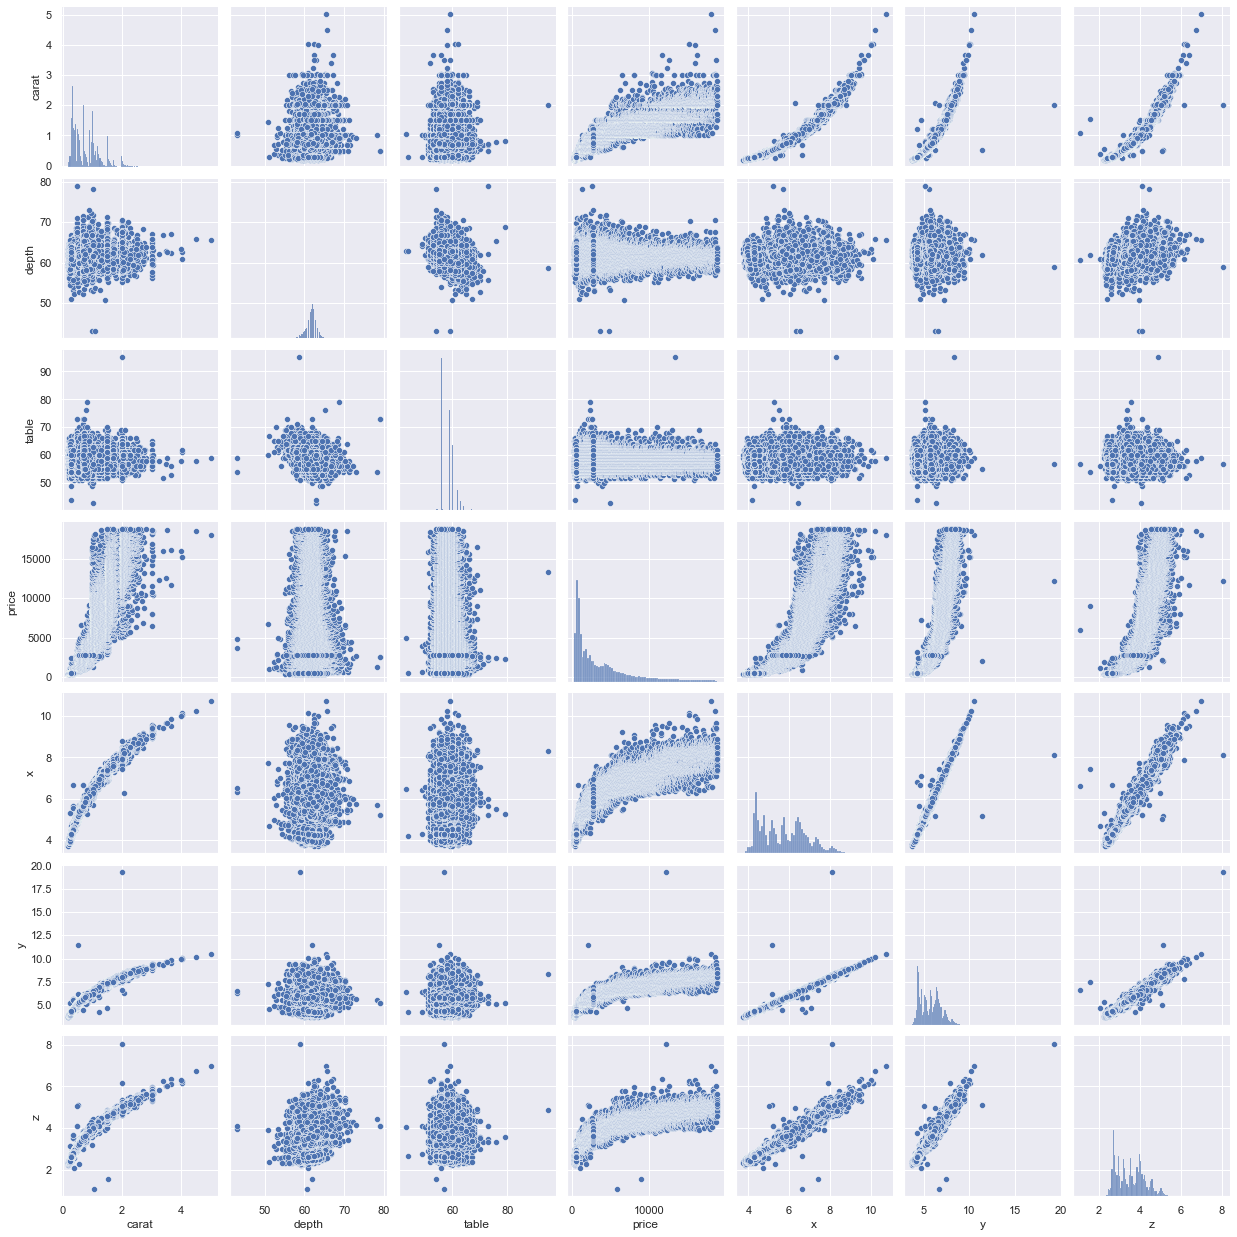

In [865]:
sns.pairplot(diamonds)

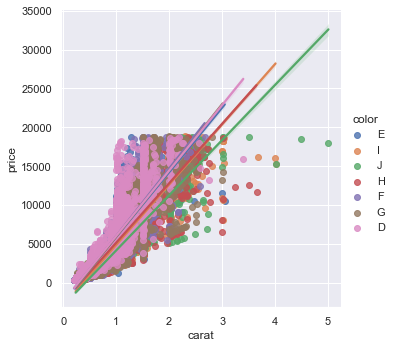

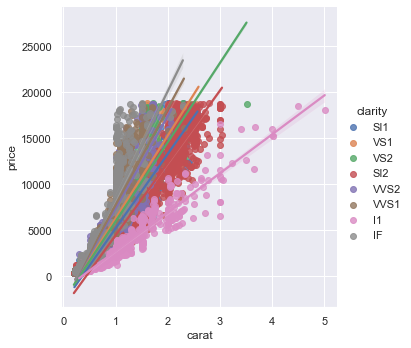

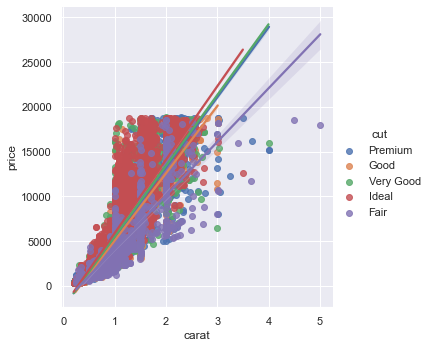

In [866]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(data=diamonds, x='carat', y='price', hue='color')
sns.lmplot(data=diamonds, x='carat', y='price', hue='clarity')
sns.lmplot(data=diamonds, x='carat', y='price', hue='cut')
#sns.scatterplot(data=diamonds, x='carat', y='price', hue='color',size='clarity', style='cut', alpha=0.5)

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


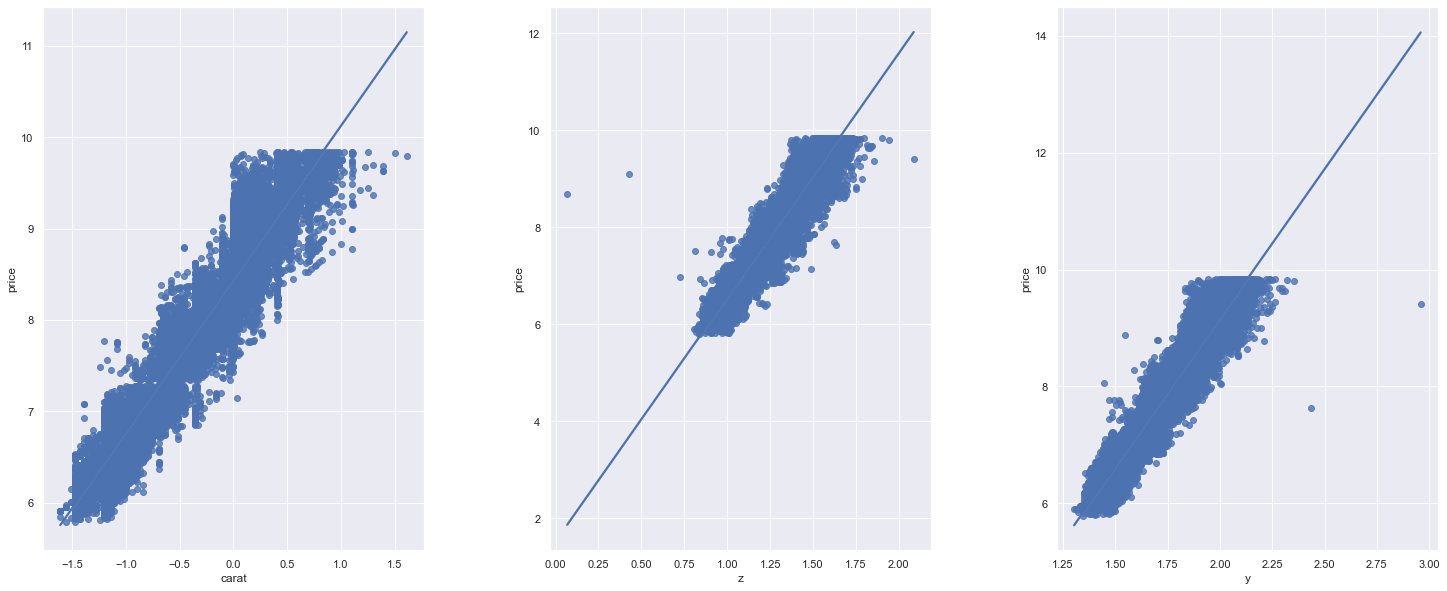

In [867]:
fig, ax = plt.subplots(1,3, figsize=(25, 10))
sns.regplot(np.log(diamonds.carat), np.log(diamonds.price), scatter=True, ax=ax[0])
sns.regplot(np.log(diamonds.z), np.log(diamonds.price), scatter=True, ax=ax[1])
sns.regplot(np.log(diamonds.y), np.log(diamonds.price), scatter=True, ax=ax[2])
plt.subplots_adjust(wspace=0.33)

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anacond

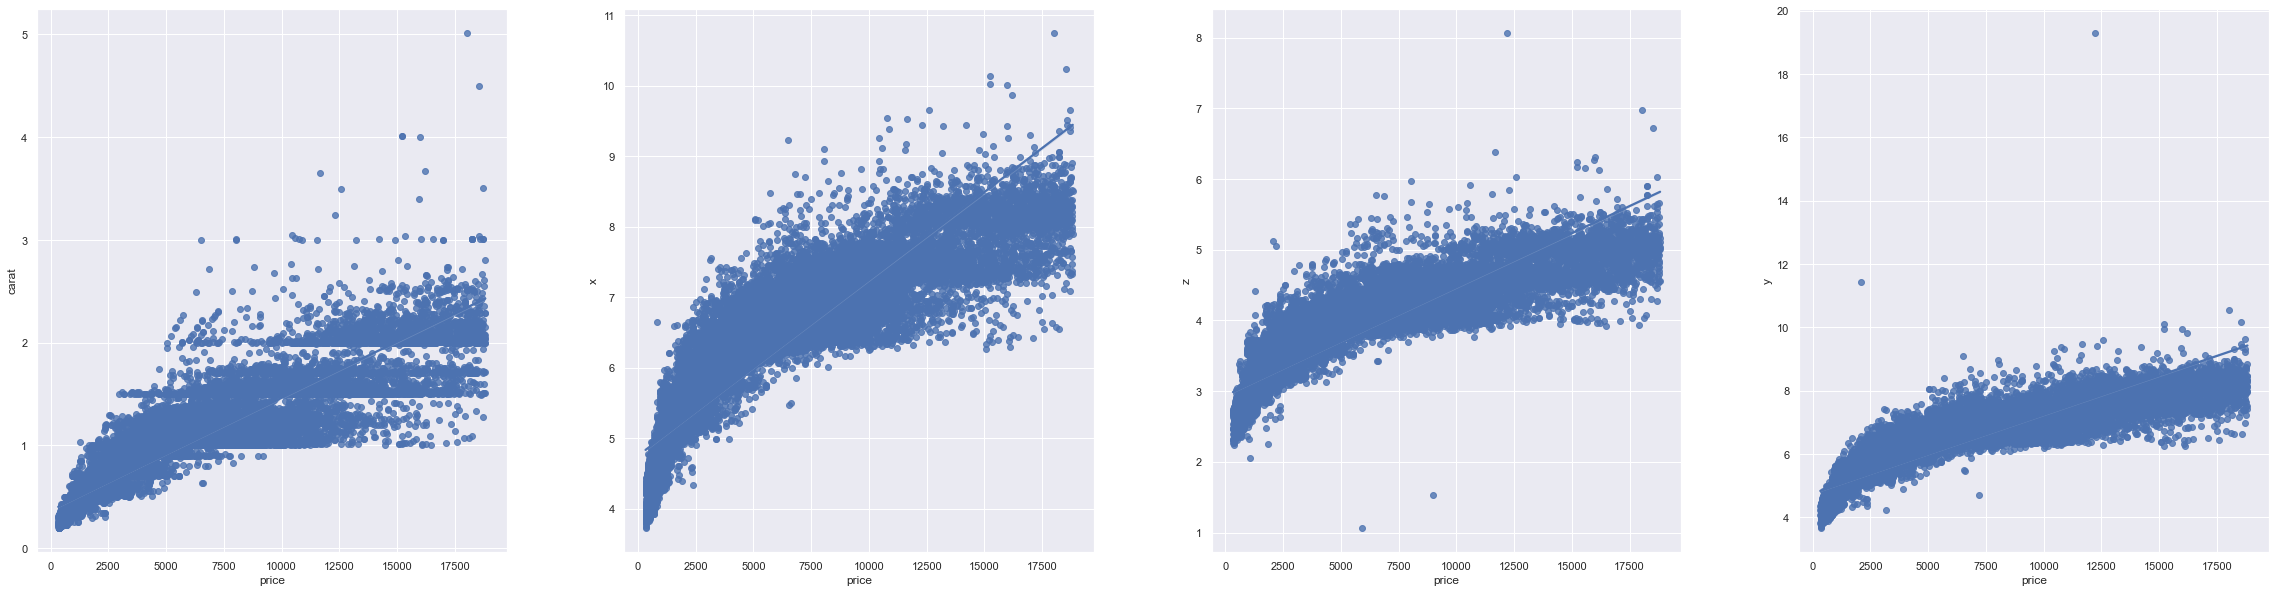

In [895]:
fig, ax = plt.subplots(1,4, figsize=(40, 10))
sns.regplot(diamonds.price, diamonds.carat, scatter=True, ax=ax[0])
sns.regplot(diamonds.price, diamonds.x, scatter=True, ax=ax[1])
sns.regplot(diamonds.price, diamonds.z, scatter=True, ax=ax[2])
sns.regplot(diamonds.price, diamonds.y, scatter=True, ax=ax[3])
plt.subplots_adjust(wspace=0.25)

In [869]:
#diamonds = diamonds[(diamonds['z'] > 2) & (diamonds['z'] < 6.5)]
#diamonds = diamonds[(diamonds['z'] < 11)]

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


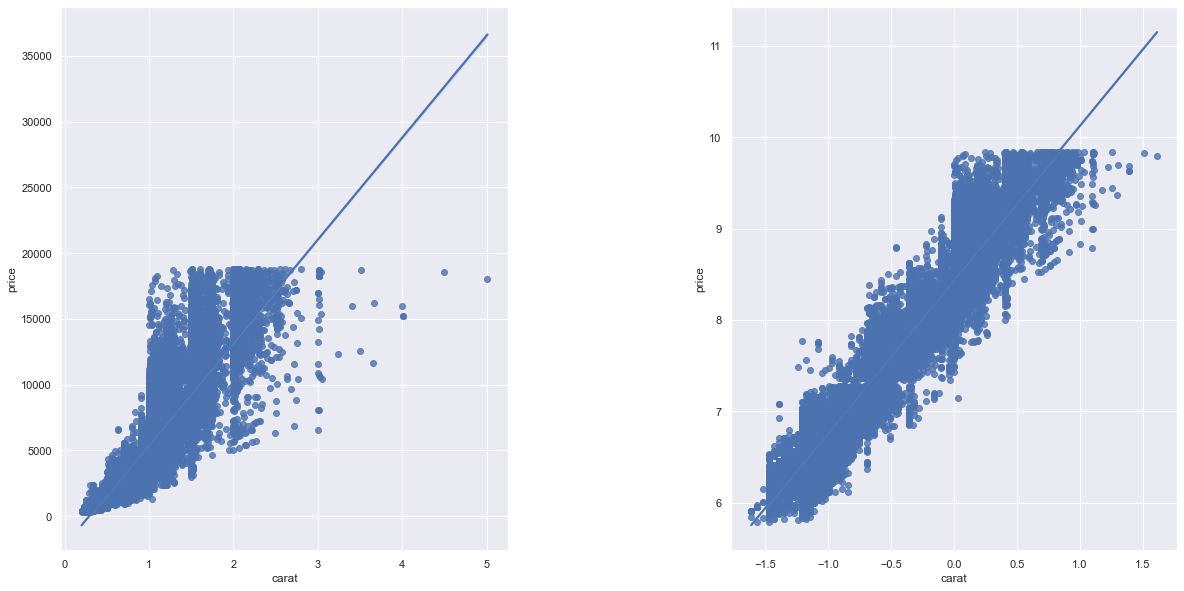

In [897]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True, ax=ax[0])
sns.regplot(np.log(diamonds.carat), np.log(diamonds.price), scatter=True, ax=ax[1])
plt.subplots_adjust(wspace=0.50)

In [871]:
def clarity(x):
    if x == 'I1':
        x = 1
    elif x == 'SI2':
        x = 2
    elif x == 'SI1':
        x = 3
    elif x == 'VS2':
        x = 4
    elif x == 'VS1':
        x = 5
    elif x == 'VVS2':
        x = 6
    elif x == 'VVS1':
        x = 7
    elif x == 'IF':
        x = 8
    return x
diamonds['clarity_1'] = diamonds['clarity'].map(clarity)

def color(x):
    if x == 'J':
        x = 1
    elif x == 'I':
        x = 2
    elif x == 'H':
        x = 3
    elif x == 'G':
        x = 4
    elif x == 'F':
        x = 5
    elif x == 'E':
        x = 6
    elif x == 'D':
        x = 7
    return x
diamonds['color_1'] = diamonds['color'].map(color)

def cut(x):
    if x == 'Fair':
        x=1
    elif x == 'Good':
        x = 2
    elif x == 'Very Good':
        x = 3
    elif x == 'Premium':
        x = 4
    elif x == 'Ideal':
        x = 5
    return x
diamonds['cut_1'] = diamonds['cut'].map(cut)

In [872]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,48933.0,0.797748,0.474093,0.20,0.40,0.70,1.04,5.01
depth,48933.0,61.751904,1.429933,43.00,61.00,61.80,62.50,79.00
table,48933.0,57.451041,2.232986,43.00,56.00,57.00,59.00,95.00
price,48933.0,3933.641592,3988.524750,326.00,949.00,2401.00,5331.00,18823.00
x,48933.0,5.731532,1.119905,3.73,4.71,5.69,6.54,10.74
y,48933.0,5.733792,1.113872,3.68,4.72,5.71,6.54,19.28
z,48933.0,3.539596,0.692143,1.07,2.91,3.52,4.04,8.06
clarity_1,48933.0,4.055504,1.645522,1.00,3.00,4.00,5.00,8.00
color_1,48933.0,4.407251,1.699909,1.00,3.00,4.00,6.00,7.00
cut_1,48933.0,3.906484,1.116507,1.00,3.00,4.00,5.00,5.00


# 5. Linear Regression

In [873]:
#X = sm.add_constant(np.log(diamonds[['carat', 'color_1', 'clarity_1', 'cut_1']]))
y = np.log(diamonds['price'])
#modelo = sm.OLS(X, y)

#lm_fit = modelo.fit()
#lm_fit.summary()

In [874]:
model_1 = LinearRegression()

df = np.log(diamonds[['carat', 'clarity_1', 'cut_1', 'color_1', 'depth', 'table']])

X1 = df

model_1.fit(X1, y)

LinearRegression()

In [875]:
model_1.coef_

array([ 1.88278207,  0.47967929,  0.09312197,  0.27673677, -0.09939193,
       -0.02596299])

In [876]:
model_1.intercept_

7.911335102490026

In [877]:
df1_pred = model_1.predict(X1)
df1_pred

array([5.61155373, 5.96661081, 6.05031365, ..., 7.90687307, 7.88980575,
       7.87599341])

In [878]:
model_1.score(X1, y)

0.9821117537388616

In [879]:
np.sqrt(mean_squared_error(y, df1_pred))

0.1356944025314551

In [880]:
#diamonds['lm_pred'] = lm_fit.predict()

In [881]:
#sns.color_palette('vlag', as_cmap=True)
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.lineplot(data = diamonds, x = 'carat', y='lm_pred')
#sns.scatterplot(data = diamonds, x = 'carat', y='price', hue = 'cut_1')

In [882]:
#diamonds.sort_values(by='lm_pred')

# 7. Predicting Prices

In [883]:
diamon_pred = pd.read_csv('data/asset-v1_IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

In [884]:
def clarity(x):
    if x == 'I1':
        x = 1
    elif x == 'SI2':
        x = 2
    elif x == 'SI1':
        x = 3
    elif x == 'VS2':
        x = 4
    elif x == 'VS1':
        x = 5
    elif x == 'VVS2':
        x = 6
    elif x == 'VVS1':
        x = 7
    elif x == 'IF':
        x = 8
    return x
diamon_pred['clarity_1'] = diamon_pred['clarity'].map(clarity)

def color(x):
    if x == 'J':
        x = 1
    elif x == 'I':
        x = 2
    elif x == 'H':
        x = 3
    elif x == 'G':
        x = 4
    elif x == 'F':
        x = 5
    elif x == 'E':
        x = 6
    elif x == 'D':
        x = 7
    return x
diamon_pred['color_1'] = diamon_pred['color'].map(color)

def cut(x):
    if x == 'Fair':
        x=1
    elif x == 'Good':
        x = 2
    elif x == 'Very Good':
        x = 3
    elif x == 'Premium':
        x = 4
    elif x == 'Ideal':
        x = 5
    return x
diamon_pred['cut_1'] = diamon_pred['cut'].map(cut)

In [885]:
diamon_pred.sort_values(by='x').head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_1,color_1,cut_1
2460,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2,5,2
1725,0.20,Premium,F,VS2,62.6,59.0,3.73,3.71,2.33,4,5,4
331,0.20,Premium,D,VS2,61.7,60.0,3.77,3.72,2.31,4,7,4
649,0.20,Premium,E,VS2,61.1,59.0,3.81,3.78,2.32,4,6,4
2921,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,4,6,1


In [886]:
#diamon_pred.drop(2460, inplace=True)
diamon_pred.sort_values(by='x').head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity_1,color_1,cut_1
2460,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2,5,2
1725,0.20,Premium,F,VS2,62.6,59.0,3.73,3.71,2.33,4,5,4
331,0.20,Premium,D,VS2,61.7,60.0,3.77,3.72,2.31,4,7,4
649,0.20,Premium,E,VS2,61.1,59.0,3.81,3.78,2.32,4,6,4
2921,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,4,6,1


In [887]:
diamon_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      5000 non-null   float64
 1   cut        5000 non-null   object 
 2   color      5000 non-null   object 
 3   clarity    5000 non-null   object 
 4   depth      5000 non-null   float64
 5   table      5000 non-null   float64
 6   x          5000 non-null   float64
 7   y          5000 non-null   float64
 8   z          5000 non-null   float64
 9   clarity_1  5000 non-null   int64  
 10  color_1    5000 non-null   int64  
 11  cut_1      5000 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 468.9+ KB


In [888]:
diamon_pred['price_predicted'] = model_1.predict(np.log(diamon_pred[['carat', 'clarity_1', 'cut_1', 'color_1', 'depth', 'table']]))
diamon_pred['price_predicted'] = np.exp(diamon_pred['price_predicted'])
diamon_pred.sort_values(by='price_predicted')

,carat,cut,color,clarity,depth,table,x,y,z,clarity_1,color_1,cut_1,price_predicted
1725,0.20,Premium,F,VS2,62.6,59.0,3.73,3.71,2.33,4,5,4,271.388103
1278,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2,6,5,272.877297
649,0.20,Premium,E,VS2,61.1,59.0,3.81,3.78,2.32,4,6,4,286.121225
331,0.20,Premium,D,VS2,61.7,60.0,3.77,3.72,2.31,4,7,4,298.170991
2921,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,4,6,1,298.748235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2.45,Ideal,F,SI2,62.0,55.0,8.67,8.64,5.36,2,5,5,22291.938445
4941,2.08,Premium,I,VVS1,62.2,58.0,8.22,8.18,5.10,7,2,4,22665.644845
1761,3.01,Premium,F,I1,62.2,56.0,9.24,9.13,5.73,1,5,4,23051.799399
1541,2.38,Premium,H,VS1,60.9,59.0,8.62,8.59,5.24,5,3,4,27854.270806


In [889]:
diamonds_pred = diamon_pred.drop(['cut_1', 'color_1', 'clarity_1'], axis=1).dropna()

In [890]:
diamonds_pred.to_csv('data/diamonds_pred.csv')

In [891]:
model_2 = LinearRegression()

df = np.log(diamon_pred[['carat', 'clarity_1', 'cut_1', 'color_1']])
X2 = df
y2 = np.log(diamon_pred['price_predicted'])

model_2.fit(X2, y2)

LinearRegression()

In [892]:
model_2.score(X2,y2)

0.9999957009189254

In [893]:
diamon_pred.describe()

,carat,depth,table,x,y,z,clarity_1,color_1,cut_1,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,4.007600,4.39160,3.881400,3873.235238
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.662196,1.71337,1.116774,3931.945679
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,271.388103
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.00000,3.000000,967.203727
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.00000,4.000000,2470.191647
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,6.00000,5.000000,5230.703710
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,8.000000,7.00000,5.000000,31708.627728


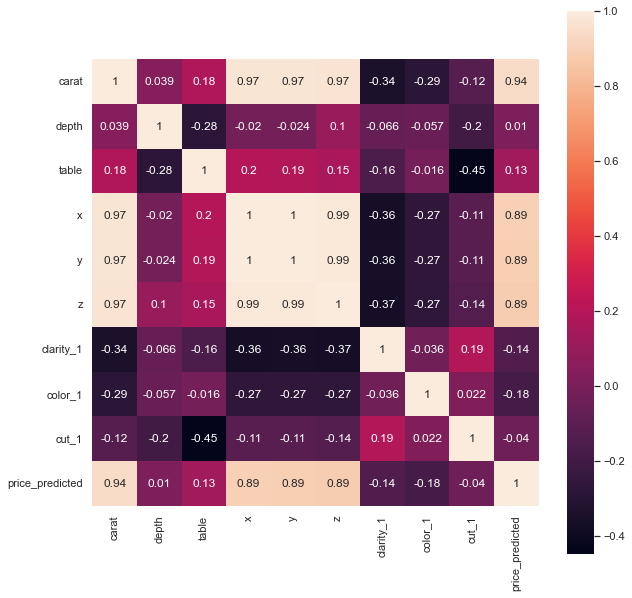

In [894]:
plt.figure(figsize=(10, 10))
sns.heatmap(diamon_pred.corr(), annot=True, square=True);

<div align='center'>
<img src="https://github.com/MatheusReali/project003_open-DiamondPricePrediction/blob/main/images/diamonds.jpg?raw=true"  width="50%">
</div>

# DIAMOND PRICE PREDICTION

## Abstract

This project has the objective of using a Data Set of Diamond's features to build a Linear Regression Model to predict the price of another Data Set of diamonds.

## Introduction

### Technology

  - Python

### Index

  1. Importing Libraries;
  2. Understanding the Data;
  3. Data Cleaning;
  4. EDA;
  5. Building the Linear Regression Model;
  6. Predicting Prices.

## 1. Importing Libraries

Libraries used:
  - Pandas;
  - Numpy;
  - matplotlib;
  - seaborn;
  - sklearn;
  - statsmodels.

## 2. Understanding the Data

Each row of the DataFrame represents a diamond and the Columns are the attributes of these diamonds.

Description of the data:

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

### THE 4 "C"s OF A DIAMOND

<div align='center'>
<img src="https://github.com/MatheusReali/project003_open-DiamondPricePrediction/blob/main/images/4Cs.jpg"  width="50%">
</div>

<b>CUT:</b> The quality of the cut is measured by its Proportion, Symmetry and Final Polish. It represents how well a diamond refracts and reflects light.

<b>COLOR:</b> A diamond has many hues and this DataSet has only the High Quality types of colors. The scale goes from "D" (best) to "Z" (Worst), but diamonds with colors from "K" to "Z" are called tinted and are not represented in this DataSet.

<b>CLARITY:</b> Diamonds have characteristics known as inclusions (internal) and blemishes (external). Diamons without inclusions or blemishes are rare.

<b>CARAT:</b> Carat represents the weight of a diamond. 1 carat = 0.2 grams. It is expected that the heavier the diamond, the higher its price.

## 3. Data Cleaning

After importing the Data Set is important to analyse some of the statistics of the data

![image](https://user-images.githubusercontent.com/95454600/192419083-44dc0d21-0438-423b-b7d6-c07095b53d7b.png)

Using the method .describe() it is possible to see that the variables 'x', 'y' and 'z' have 'min' values as 0. This is not possible, since the diamond is a 3D object.

So let's take a look at this values

![image](https://user-images.githubusercontent.com/95454600/192419425-75fddb90-f8e4-411b-9572-9022af713bab.png)

Now we can calculate some of the variables using the formula presented on the table above. Then we will drop the rows that are missing more than 2 values.

Observing some plots, we can see outliers:

![image](https://user-images.githubusercontent.com/95454600/192421368-923a471c-074f-42e0-afe5-8a0d4927a56c.png)

Let' treat them using the previous formula

![image](https://user-images.githubusercontent.com/95454600/192420830-57fff302-9ed5-4cf9-9934-6da6de6211a1.png)

## 4. EDA

It is possible to see some relations between the 4 C's of the diamonds and the prices

![image](https://user-images.githubusercontent.com/95454600/192420992-f0676319-00f2-460a-90f6-38ab45262b95.png)
![image](https://user-images.githubusercontent.com/95454600/192421006-674e07bd-5c00-4553-b7ec-771cdfa84b25.png)
![image](https://user-images.githubusercontent.com/95454600/192421025-0003c563-7412-4fc2-a6c0-6bb17873c08e.png)

Let's plot a graph 'carat x price', then transform these variables to logarithmic scale and plot it again.

![image](https://user-images.githubusercontent.com/95454600/192422983-3dc50cf2-2faf-4a16-9c01-9d6b89829922.png)

To build the model, we have to transform the categorical data (color, clarity and cut) to numbers.

![image](https://user-images.githubusercontent.com/95454600/192423710-091fd281-861b-4113-be46-bf63246a7bd9.png)

## 5. Building the Linear Regression Model

We will use the Sklearn library to build the Linear Regression Model.

The log of the variables 'carat', 'clarity_1', 'cut_1', 'color_1', 'depth' and 'table' will be used to train the model.

![image](https://user-images.githubusercontent.com/95454600/192426266-50b8adaf-2b25-4eae-bc2c-491d15507b85.png)

### 6. Predicting Prices

After importing the Data Set that we want to predict the prices, we will transform the categorical data to numbers as above. Then we will use the model we trained to predict the prices of the new Data Set.

![image](https://user-images.githubusercontent.com/95454600/192426755-c148aafb-7a4d-4966-b9e9-bf2ae5435066.png)

With the DataFrame ready, we can export it to a csv file.

Finally we will use the website https://daft-oct2020-rick-diamonds.herokuapp.com to see our mean squared error.

![image](https://user-images.githubusercontent.com/95454600/192427403-ddd2f69f-eaf6-4d1b-8da2-b6e2283c2688.png)




